In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Description

In [4]:
print(df.describe())
df.info()

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

## Univariate Analysis

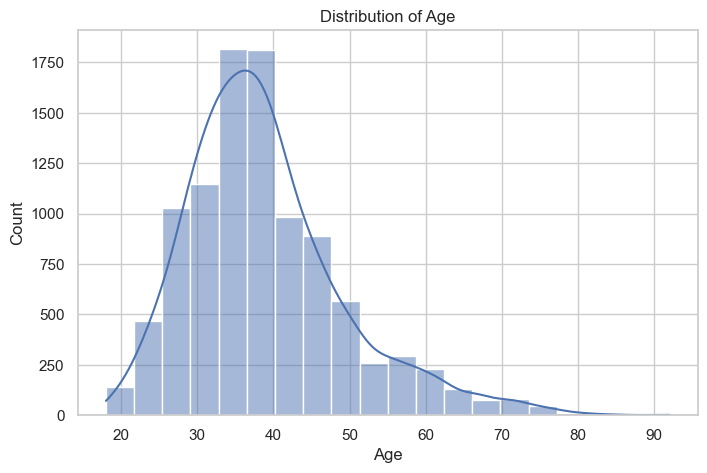

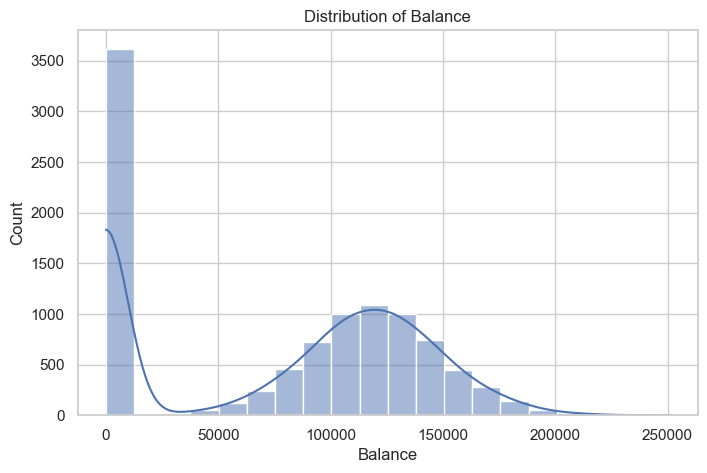

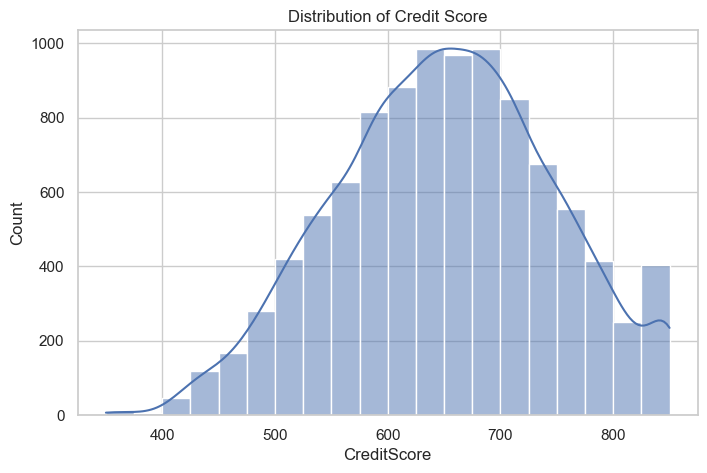

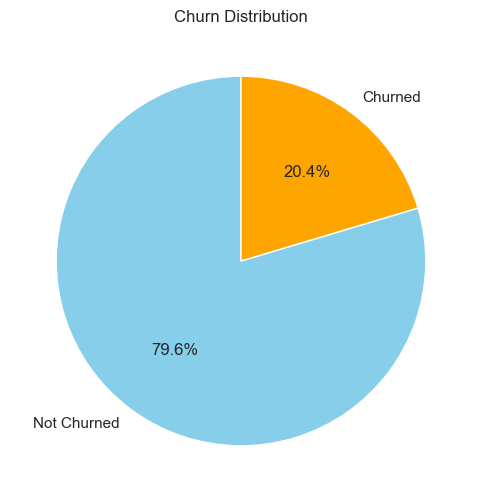

In [44]:
# --- Univariate Analysis ---
# 1. Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

# 2. Distribution of Balance
plt.figure(figsize=(8, 5))
sns.histplot(df['Balance'], kde=True, bins=20)
plt.title('Distribution of Balance')
plt.show()

# 3. Distribution of Credit Score
plt.figure(figsize=(8, 5))
sns.histplot(df['CreditScore'], kde=True, bins=20)
plt.title('Distribution of Credit Score')
plt.show()

# 4. Pie Chart for Churn (Exited)
churn_count = df['Exited'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_count, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.show()



## Bivariate Analysis

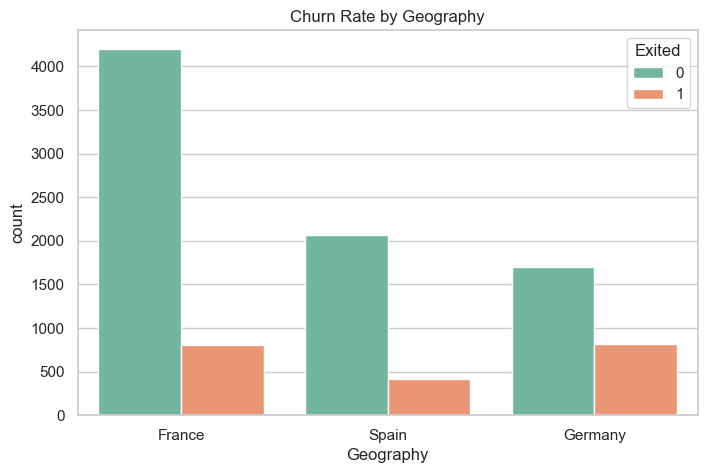

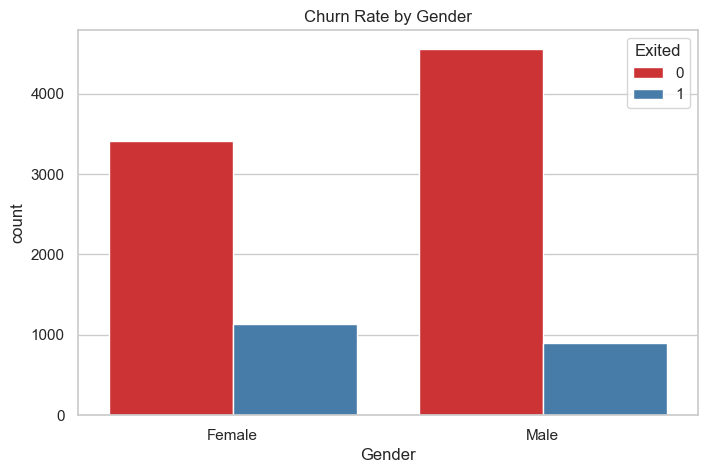

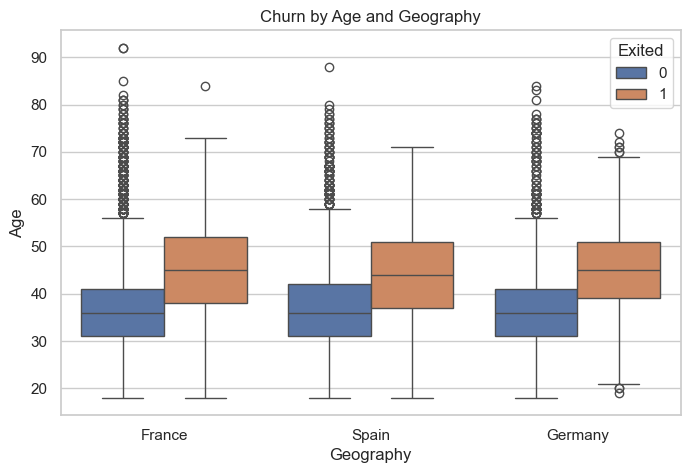

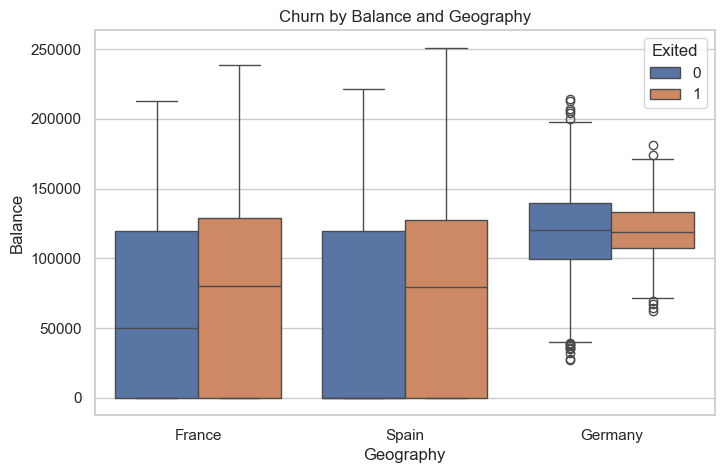

In [45]:
# --- Bivariate Analysis ---
# 1. Churn Rate by Geography --------IMP ----------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set2')
plt.title('Churn Rate by Geography')
plt.show()

## Comments - The Churn Rate in Germany is significantly higher than the other geographies, hence it need special attention

# 2. Churn Rate by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set1')
plt.title('Churn Rate by Gender')
plt.show()

# 3. Churn by Age and Geography
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Geography', y='Age', hue='Exited')
plt.title('Churn by Age and Geography')
plt.show()

# 4. Churn by Balance and Geography
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Geography', y='Balance', hue='Exited')
plt.title('Churn by Balance and Geography')
plt.show()

## Pairplot

<Figure size 1000x600 with 0 Axes>

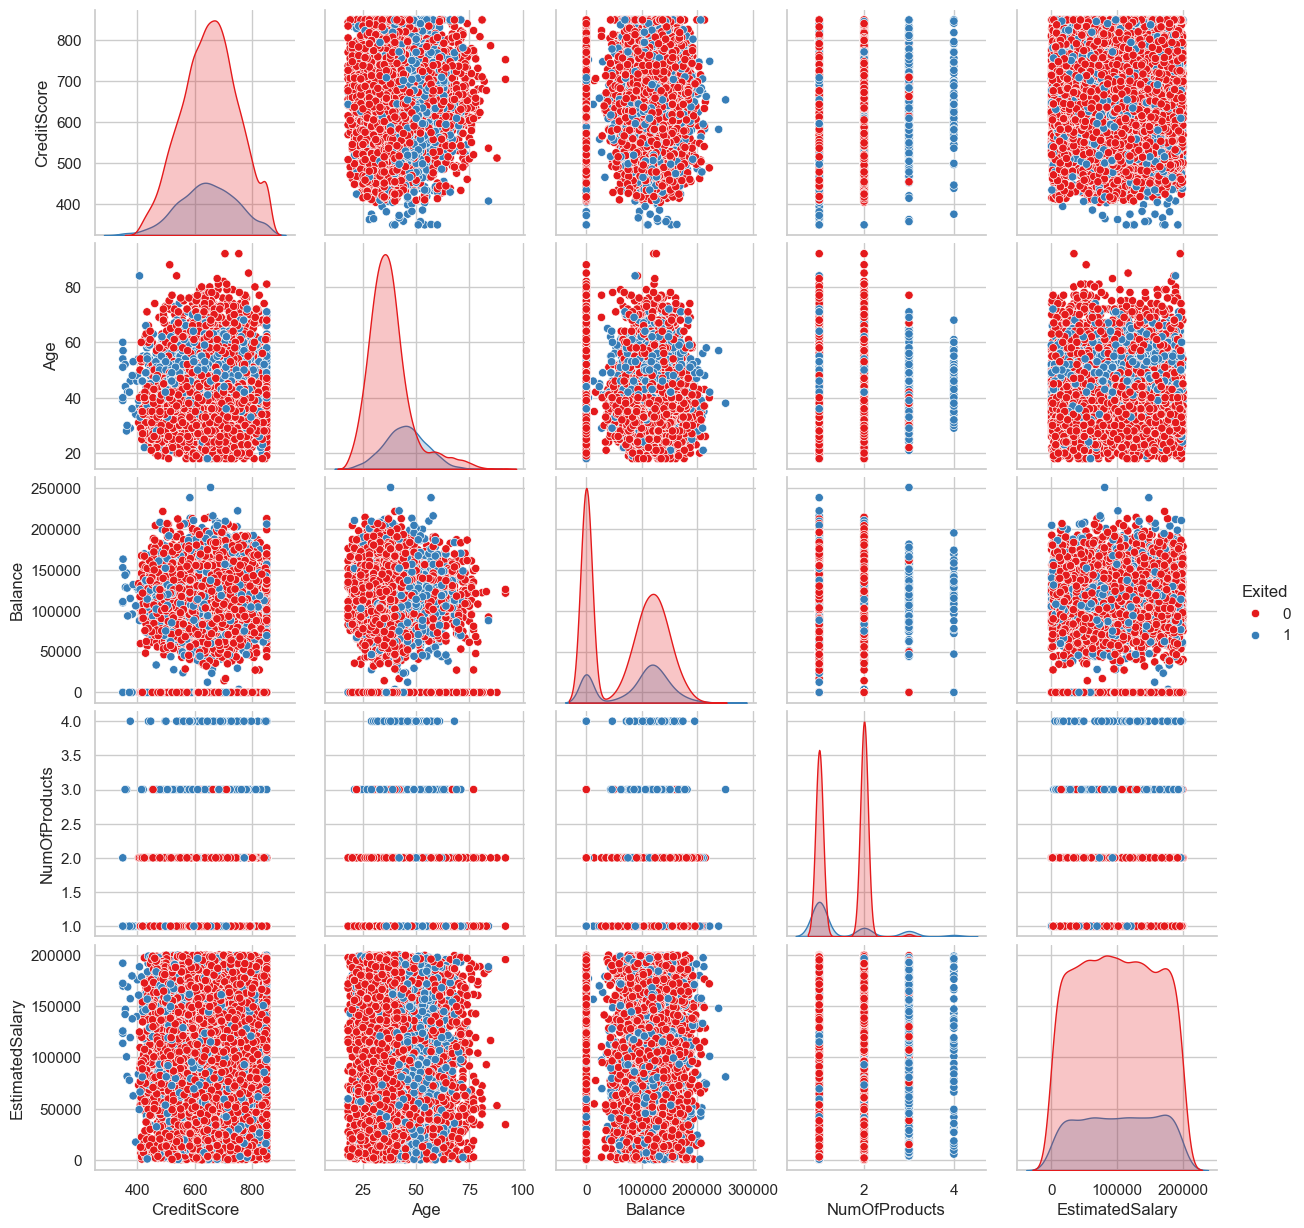

In [48]:
# --- Multivariate Analysis ---

# 2. Pairplot to Visualize Interaction Between Variables and Churn
plt.figure(figsize=(10, 6))
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']], hue='Exited', diag_kind='kde', palette='Set1')
plt.show()


## Churn Analysis

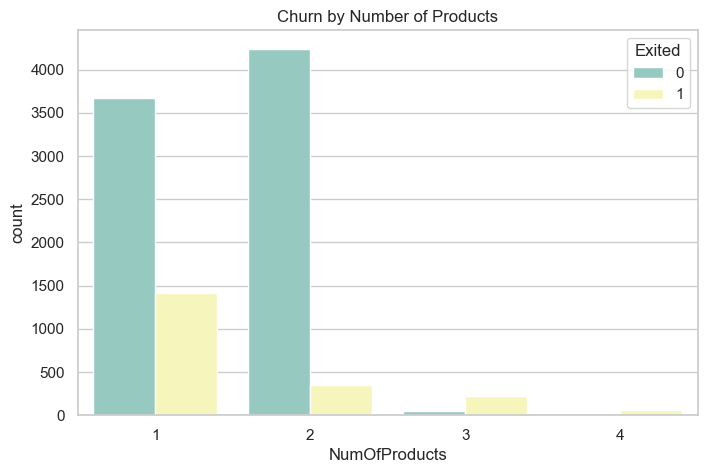

<Figure size 800x600 with 0 Axes>

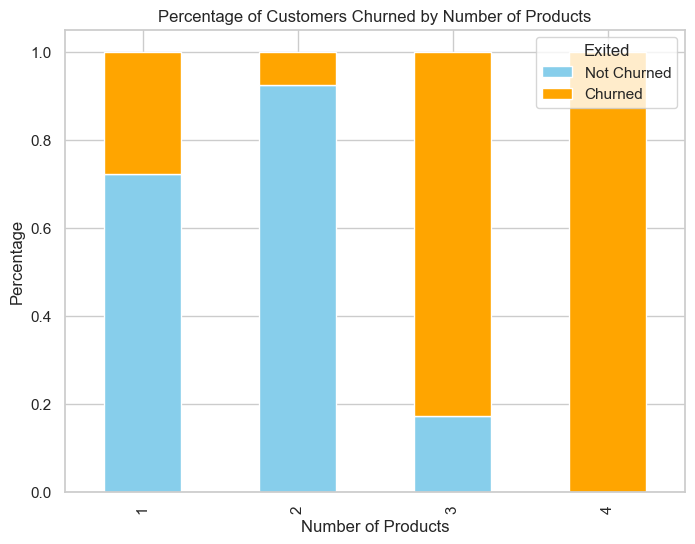

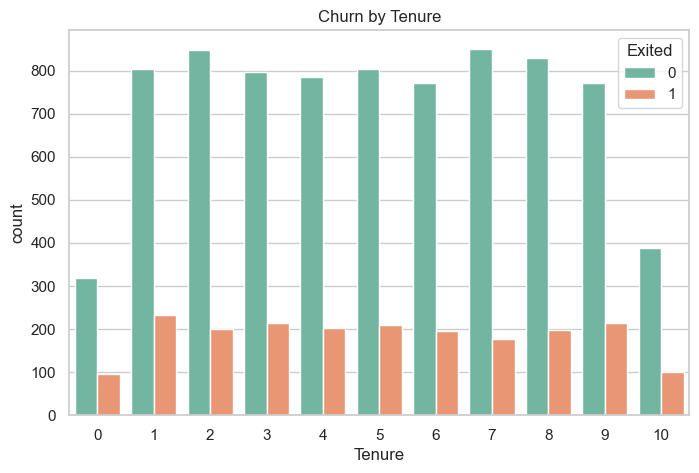

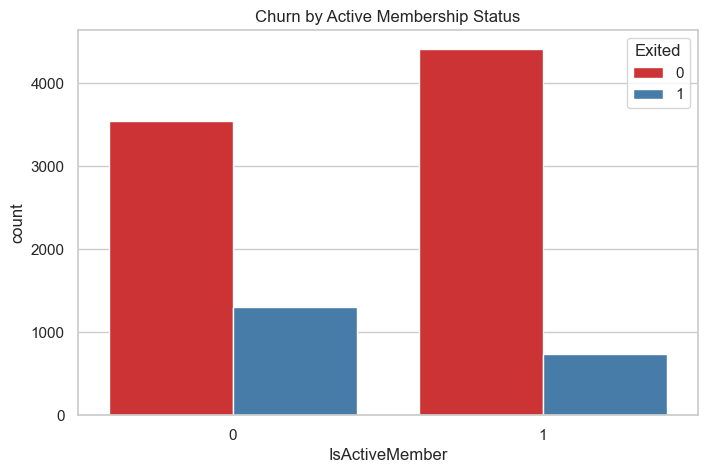

In [46]:
# --- Additional Analysis ---
# 1. Churn by Number of Products -------- IMP -----------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='Set3')
plt.title('Churn by Number of Products')
plt.show()

#1.1 Plot to show the percentage of churned vs non-churned for each number of products

num_products_churn = df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack()
plt.figure(figsize=(8, 6))
num_products_churn.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(8, 6))
# Set plot labels and title
plt.title('Percentage of Customers Churned by Number of Products')
plt.ylabel('Percentage')
plt.xlabel('Number of Products')
plt.legend(['Not Churned', 'Churned'], title='Exited')
plt.show()

# Comments : This shows that people who own more than 2 bank products need special attention as they are the ones who will most likely churn.

# 2. Churn by Tenure
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tenure', hue='Exited', palette='Set2')
plt.title('Churn by Tenure')
plt.show()

# 3. Churn by IsActiveMember
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette='Set1')
plt.title('Churn by Active Membership Status')
plt.show()

## Geographical Analysis

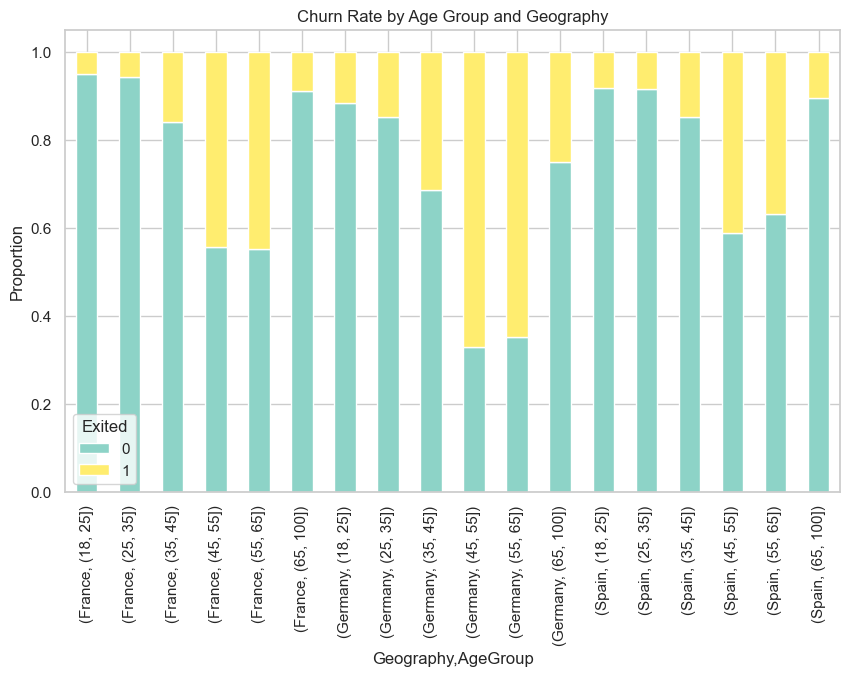

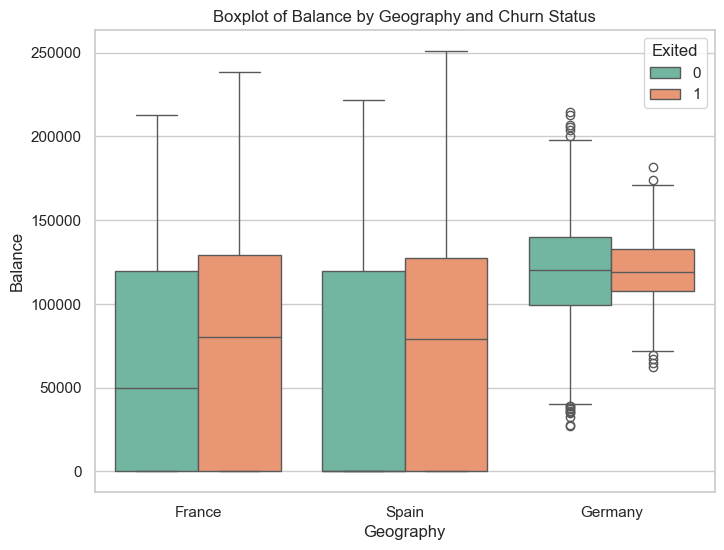

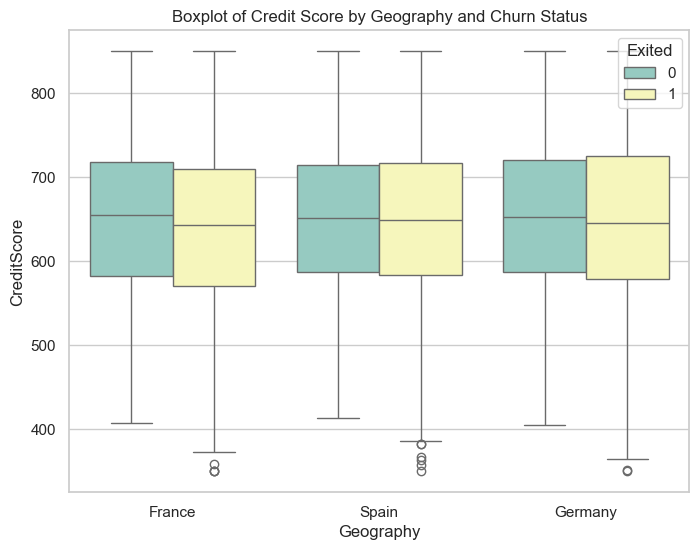

In [47]:
# --- Geographic Analysis ---
# 1. Stacked Bar Chart for Churn Rate by Age Group in Each Geography ---------- IMP ----------
age_bins = [18, 25, 35, 45, 55, 65, 100]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

geo_age_churn = pd.crosstab(index=[df['Geography'], df['AgeGroup']], columns=df['Exited'], normalize='index')
geo_age_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Churn Rate by Age Group and Geography')
plt.ylabel('Proportion')
plt.show()

# Comments - People between the age of 45 - 65 has the highest churning rate across all geograpgies may be due to retirement planning and needs attention.

# 2. Box Plot for Balance vs Churn Rate Comparison in Each Geography
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Geography', y='Balance', hue='Exited', palette='Set2')
plt.title('Boxplot of Balance by Geography and Churn Status')
plt.show()

# 3. Box Plot for Credit Score vs Churn Rate Comparison in Each Geography
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Geography', y='CreditScore', hue='Exited', palette='Set3')
plt.title('Boxplot of Credit Score by Geography and Churn Status')
plt.show()

# Comments - This doesn't show much effect but shows that people with low credit score will likely to be churn slightly more specially the ones below 400.

## Data Manipulation if Age binning is required

In [5]:

# divide age into categories
#df with binning age:
# Define custom age bins
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60','60+']

# Apply binning using cut
df_age = df.copy()
df_age['age_group'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
# Adding age quartile:
 # = pd.qcut(df['age'], q=4, retbins=True, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# print("Quartile bins:", bins)
df_age['age_group_quantile'] = pd.qcut(df_age['Age'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5','Q6'])
age_quartiles, bins =  pd.qcut(df['Age'], q=6, retbins=True, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5','Q6'])
print("Quartile bins:", bins) # just to get the age bins
df_age[['age_group', 'age_group_quantile']].drop_duplicates()

Quartile bins: [18. 30. 34. 37. 41. 48. 92.]


,age_group,age_group_quantile
0,41-45,Q5
1,41-45,Q4
3,36-40,Q4
6,51-55,Q6
7,26-30,Q1
10,31-35,Q2
11,18-25,Q1
14,36-40,Q3
15,46-50,Q5
16,56-60,Q6


## Changing Gender to Categories

In [6]:
clean_df = df.drop(columns = ['CustomerId','Surname','RowNumber'])
clean_df['Gender'] = clean_df['Gender'].map({'Male':1, 'Female':0})
clean_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


## Churn Percentage in Each Category

In [8]:
churn_by_geo = clean_df.groupby('Geography')['Exited'].mean()

# Number of churns for each geography
churn_counts_geo = clean_df.groupby('Geography')['Exited'].sum()

print(churn_by_geo, churn_counts_geo)

'''
The churn rates across the three geographies are as follows:

Germany: 32.4% of customers have churned.
France: 16.1% of customers have churned.
Spain: 16.7% of customers have churned.
'''

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64 Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


'\nThe churn rates across the three geographies are as follows:\n\nGermany: 32.4% of customers have churned.\nFrance: 16.1% of customers have churned.\nSpain: 16.7% of customers have churned.\n'

## Unrequired Data

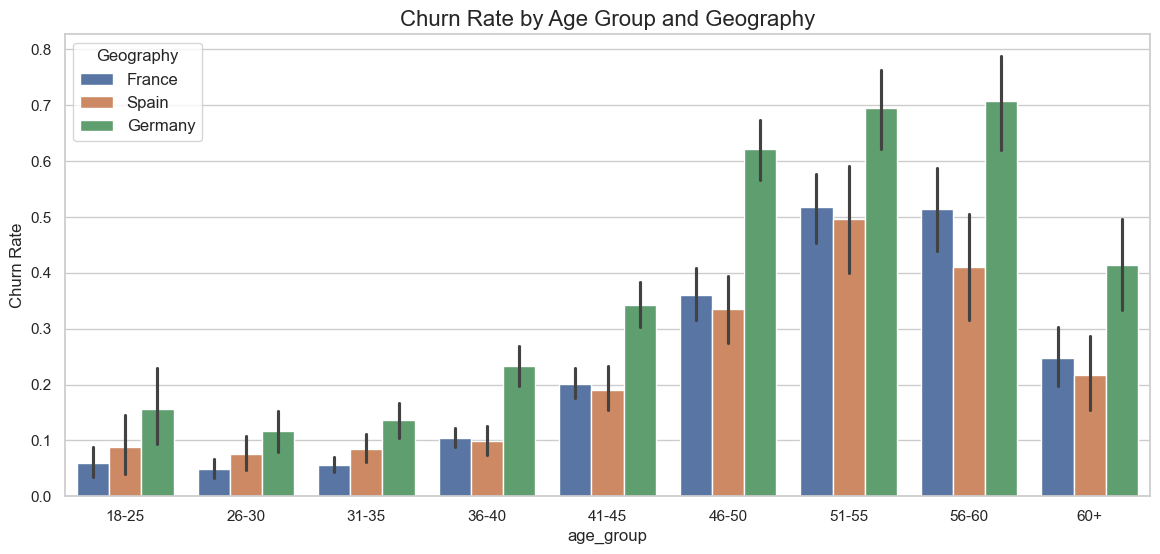

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set the style for the plots
# sns.set(style="whitegrid")

# # Function to plot churn by a specific column for each geography
# def plot_churn_by_group(column, title,data):
#     plt.figure(figsize=(14, 6))
#     sns.barplot(data=data, x=column, y='Exited', hue='Geography')
#     plt.title(title, fontsize=16)
#     plt.ylabel('Churn Rate', fontsize=12)
#     plt.xlabel(column, fontsize=12)
#     plt.legend(title='Geography', fontsize=12)
#     plt.show()

# # Plot churn by AgeGroup
# plot_churn_by_group('age_group', 'Churn Rate by Age Group and Geography',df_age)




In [19]:
# # Plot churn by Balance
# # plot_churn_by_group('NumOfProducts', 'Churn Rate by Balance and Geography',df_age)

# plt.figure(figsize=(14, 6))
# sns.lineplot(data=df_age, x='NumOfProducts', y='Exited', hue='Geography')
# plt.title(title, fontsize=16)
# plt.ylabel('Churn Rate', fontsize=12)
# plt.xlabel(column, fontsize=12)
# plt.legend(title='Geography', fontsize=12)
# plt.show()
# # plot_churn_by_group('Balance', 'Churn Rate by Balance and Geography',df_age)

# # Plot churn by CreditScore
# # plot_churn_by_group('CreditScore', 'Churn Rate by Credit Score and Geography',df_age)

In [ ]:
# plt.figure(figsize=(14, 6))
# sns.boxplot(data=df_age, y='EstimatedSalary', x='Exited', hue='Geography')
# plt.title(title, fontsize=16)
# plt.ylabel('Churn Rate', fontsize=12)
# plt.xlabel(column, fontsize=12)
# plt.legend(title='Geography', fontsize=12)
# plt.show()

In [22]:
# features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# # Create a pairplot to visualize the relationships between features
# sns.pairplot(clean_df[features], hue='Exited', diag_kind='kde', palette='Set1')

# # Show the plot
# plt.show()


## Separating Data Geography wise

In [23]:
market = df.Geography.unique()
market
combine_data = {}

for i in market:
    combine_data[i] = clean_df[clean_df['Geography']==i]

# combine_data

In [24]:
df_fr = combine_data['France']
df_ger = combine_data['Germany']
df_sp = combine_data['Spain']

df_fr = df_fr.drop(columns=['Geography'])
df_ger = df_ger.drop(columns=['Geography'])
df_sp = df_sp.drop(columns=['Geography'])

df_fr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
6,822,1,50,7,0.00,2,1,1,10062.80,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0


### Correlation Matrix for Each Geography

In [25]:
corr_fr  =  df_fr.corr()
# plt.figure(figsize=(6,6), dpi =500)
# sns.heatmap(corr_fr,annot=True,fmt=".2f", linewidth=.5)
# plt.show()
corr_fr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.004508,-0.002055,0.003578,0.019835,0.016338,0.016179,0.027649,0.010136,-0.035084
Gender,0.004508,1.000000,-0.022701,0.017121,0.025013,-0.026430,0.017317,0.005116,0.005294,-0.103180
Age,-0.002055,-0.022701,1.000000,0.001914,-0.001593,-0.019721,-0.007916,0.107284,-0.017982,0.277646
Tenure,0.003578,0.017121,0.001914,1.000000,-0.017998,0.021043,0.018768,-0.016566,-0.009079,-0.000697
Balance,0.019835,0.025013,-0.001593,-0.017998,1.000000,-0.399907,-0.024738,-0.020674,0.012666,0.062290
NumOfProducts,0.016338,-0.026430,-0.019721,0.021043,-0.399907,1.000000,-0.009237,0.022677,0.026019,-0.041848
HasCrCard,0.016179,0.017317,-0.007916,0.018768,-0.024738,-0.009237,1.000000,-0.004257,-0.012010,-0.004003
IsActiveMember,0.027649,0.005116,0.107284,-0.016566,-0.020674,0.022677,-0.004257,1.000000,-0.018266,-0.130749
EstimatedSalary,0.010136,0.005294,-0.017982,-0.009079,0.012666,0.026019,-0.012010,-0.018266,1.000000,0.027104
Exited,-0.035084,-0.103180,0.277646,-0.000697,0.062290,-0.041848,-0.004003,-0.130749,0.027104,1.000000


In [26]:
corr_ger  =  df_ger.corr()
# plt.figure(figsize=(6,6), dpi =500)
# sns.heatmap(corr_ger,annot=True,fmt=".2f", linewidth=.5)
# plt.show()
corr_ger

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.015912,-0.031370,-0.025567,-0.039501,-0.001295,-0.037829,0.032048,-0.008055,-0.026579
Gender,-0.015912,1.000000,-0.034638,0.014383,0.020587,0.012934,0.015185,0.054924,-0.021788,-0.103908
Age,-0.031370,-0.034638,1.000000,0.011335,0.012368,-0.029630,-0.022218,0.022588,-0.009480,0.337547
Tenure,-0.025567,0.014383,0.011335,1.000000,0.021063,-0.002630,0.035505,-0.056619,0.036654,-0.000902
Balance,-0.039501,0.020587,0.012368,0.021063,1.000000,0.001730,0.035589,0.005321,-0.001272,0.016184
NumOfProducts,-0.001295,0.012934,-0.029630,-0.002630,0.001730,1.000000,0.023019,0.040389,0.004334,-0.072940
HasCrCard,-0.037829,0.015185,-0.022218,0.035505,0.035589,0.023019,1.000000,-0.031500,0.013488,-0.007643
IsActiveMember,0.032048,0.054924,0.022588,-0.056619,0.005321,0.040389,-0.031500,1.000000,-0.009167,-0.185409
EstimatedSalary,-0.008055,-0.021788,-0.009480,0.036654,-0.001272,0.004334,0.013488,-0.009167,1.000000,-0.032234
Exited,-0.026579,-0.103908,0.337547,-0.000902,0.016184,-0.072940,-0.007643,-0.185409,-0.032234,1.000000


In [27]:
corr_sp  =  df_sp.corr()
# plt.figure(figsize=(6,6), dpi =500)
# sns.heatmap(corr_sp,annot=True,fmt=".2f", linewidth=.5)
# plt.show()
# df_sp.columns
corr_sp

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004090,0.019603,0.023575,-0.007400,0.019359,-0.016453,0.014943,-0.018434,-0.018252
Gender,-0.004090,1.000000,-0.026145,0.010016,0.026978,-0.052783,-0.025384,0.022511,-0.020069,-0.107857
Age,0.019603,-0.026145,1.000000,-0.056970,0.035429,-0.052886,-0.010275,0.109201,0.015322,0.225147
Tenure,0.023575,0.010016,-0.056970,1.000000,-0.020171,0.015988,0.017317,-0.023329,0.011867,-0.058909
Balance,-0.007400,0.026978,0.035429,-0.020171,1.000000,-0.396516,-0.039677,0.032307,0.009065,0.074494
NumOfProducts,0.019359,-0.052783,-0.052886,0.015988,-0.396516,1.000000,0.007389,-0.052502,0.001699,-0.020637
HasCrCard,-0.016453,-0.025384,-0.010275,0.017317,-0.039677,0.007389,1.000000,-0.006266,-0.030104,-0.021049
IsActiveMember,0.014943,0.022511,0.109201,-0.023329,0.032307,-0.052502,-0.006266,1.000000,0.001155,-0.168731
EstimatedSalary,-0.018434,-0.020069,0.015322,0.011867,0.009065,0.001699,-0.030104,0.001155,1.000000,0.032821
Exited,-0.018252,-0.107857,0.225147,-0.058909,0.074494,-0.020637,-0.021049,-0.168731,0.032821,1.000000


## VIF Analysis

In [57]:
# doing vif:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
print('France: \n',vif_scores(df_fr.iloc[:,:-1]),'\n')
print('Spain: \n',vif_scores(df_sp.iloc[:,:-1]),'\n')
print('Germany: \n',vif_scores(df_ger.iloc[:,:-1]),'\n')

print('France: \n',vif_scores(df_fr[['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]),'\n')
print('Spain: \n',vif_scores(df_sp[['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]),'\n')
print('Germany: \n',vif_scores(df_ger[['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]),'\n')


France: 
   Independent Features  VIF Scores
0          CreditScore   21.659735
1               Gender    2.212770
2                  Age   13.443775
3               Tenure    3.874314
4              Balance    2.193390
5        NumOfProducts    8.541703
6            HasCrCard    3.315734
7       IsActiveMember    2.152505
8      EstimatedSalary    3.909571
9               Exited    1.351325 

Spain: 
   Independent Features  VIF Scores
0          CreditScore   22.674198
1               Gender    2.231912
2                  Age   12.709334
3               Tenure    3.978815
4              Balance    2.159454
5        NumOfProducts    8.635480
6            HasCrCard    3.166693
7       IsActiveMember    2.147343
8      EstimatedSalary    3.883484 

Germany: 
   Independent Features  VIF Scores
0          CreditScore   22.804704
1               Gender    2.089102
2                  Age   12.822196
3               Tenure    3.835341
4              Balance   16.459218
5        NumOfProduct

## Calculating Feature Importance

In [29]:
## Checking the feature importance

X_train = df_fr.iloc[:,:-1]
y_train = df_fr.iloc[:,-1]
# Assume X_train and y_train are your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
2              Age    0.244509
8  EstimatedSalary    0.159941
0      CreditScore    0.155741
4          Balance    0.136908
5    NumOfProducts    0.131298
3           Tenure    0.088065
7   IsActiveMember    0.041820
6        HasCrCard    0.021261
1           Gender    0.020458


In [39]:
df_fr_imp_ft = df_fr[['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited' ]]

X_train = df_fr_imp_ft.iloc[:,:-1]
y_train = df_fr_imp_ft.iloc[:,-1]

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Comments - Tried Removing each feature and the order remained same for the feature importance, Hence we can go ahead with these features.

           Feature  Importance
1              Age    0.282523
7  EstimatedSalary    0.220057
3          Balance    0.167202
4    NumOfProducts    0.138345
2           Tenure    0.109330
6   IsActiveMember    0.038979
5        HasCrCard    0.022401
0           Gender    0.021163


In [52]:
vif_scores(df_fr_imp_ft.iloc[:,:-1]) 

,Independent Features,VIF Scores
0,Age,11.931382
1,EstimatedSalary,3.873814
2,CreditScore,18.343285
3,Balance,2.618790
4,NumOfProducts,7.601769


# Models 

## 1. Regression

In [51]:
df_fr.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [55]:
x = df_fr
x = df_fr.iloc[:,:-1]
xg = sm.add_constant(x)
yg = df_fr.iloc[:,-1]

model = sm.Logit(yg, xg).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.382955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 5014
Model:                          Logit   Df Residuals:                     5004
Method:                           MLE   Df Model:                            9
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.1340
Time:                        16:55:08   Log-Likelihood:                -1920.1
converged:                       True   LL-Null:                       -2217.3
Covariance Type:            nonrobust   LLR p-value:                3.353e-122
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5622      0.362     -9.850      0.000      -4.271      -2.853
CreditScore   

In [80]:
df_fr_cat = df_fr[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

dummies = pd.get_dummies(df_fr['NumOfProducts']).rename(columns=lambda x: 'Product_count_' + str(x))
for i in dummies.columns:
    dummies[i] = dummies[i].astype(int)

df_fr_cat = pd.concat([df_fr, dummies], axis=1)
df_fr_cat = df_fr_cat.drop(['NumOfProducts'] ,axis=1)
print(df_fr_cat.columns)


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Product_count_1',
       'Product_count_2', 'Product_count_3', 'Product_count_4'],
      dtype='object')


In [82]:
print(df_fr_cat)


      CreditScore  Gender  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0             619       0   42       2       0.00          1               1   
2             502       0   42       8  159660.80          1               0   
3             699       0   39       1       0.00          0               0   
6             822       1   50       7       0.00          1               1   
8             501       1   44       4  142051.07          0               1   
...           ...     ...  ...     ...        ...        ...             ...   
9994          800       0   29       2       0.00          0               0   
9995          771       1   39       5       0.00          1               0   
9996          516       1   35      10   57369.61          1               1   
9997          709       0   36       7       0.00          0               1   
9999          792       0   28       4  130142.79          1               0   

      EstimatedSalary  Exited  Product_

In [86]:
x = df_fr_cat
x = df_fr_cat[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',
       'Product_count_2', 'Product_count_3', 'Product_count_4']]
xg = sm.add_constant(x)
yg = df_fr_cat['Exited']

model = sm.Logit(yg, xg.astype(float)).fit()
print(model.summary())


##### 
#can we drop num poroduct 1 to get the coefficients? is this correct or not , beacuse otherwise we are getting mutlicioliniarity as they are ordinal values

         Current function value: 0.332946
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 5014
Model:                          Logit   Df Residuals:                     5002
Method:                           MLE   Df Model:                           11
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.2471
Time:                        21:21:55   Log-Likelihood:                -1669.4
converged:                      False   LL-Null:                       -2217.3
Covariance Type:            nonrobust   LLR p-value:                4.405e-228
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7932      0.368     -7.594      0.000      -3.514      -2.072
CreditScore        -0.0010      0.000     -2.214  

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
